In [1]:
import random
import oommfc as oc
import discretisedfield as df
%matplotlib inline

# Uniaxial anisotropy

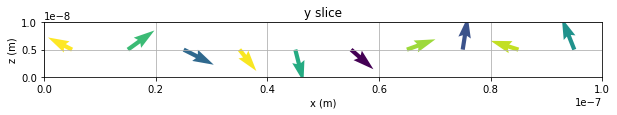

In [4]:
p1 = (0, 0, 0)
p2 = (100e-9, 10e-9, 10e-9)
cell = (10e-9, 10e-9, 10e-9)

mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

def random_m(pos):
    mx = 2*random.random() - 1
    my = 2*random.random() - 1
    mz = 2*random.random() - 1
    return (mx, my, mz)

Ms = 8e6  # magnetisation saturation (A/m)
random_field = df.Field(mesh, value=random_m, norm=Ms)
random_field.plot_slice("y", 0);

2017/3/19 12:33: Calling OOMMF (uniaxial_anisotropy_tutorial/uniaxial_anisotropy_tutorial.mif) ... [0.8s]


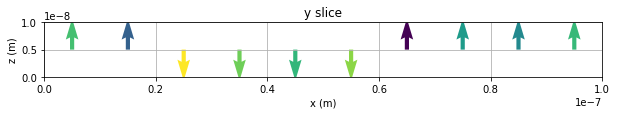

In [5]:
system = oc.System(name="uniaxial_anisotropy_tutorial")

gamma = 2.211e5  # gyrotropic ration
alpha = 0.5  # Gilbert damping
system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)

K = 5e5  # uniaxial anisotropy constant (J/m**3)
u = (0, 0, 1)  # uniaxial anisotropy axis
uniaxial_anisotropy = oc.UniaxialAnisotropy(K=K, u=u)
system.hamiltonian = uniaxial_anisotropy

system.m = random_field

td = oc.TimeDriver()
td.drive(system, t=1e-9, n=1)

system.m.plot_slice("y", 0);